In [1]:
import pandas_datareader as pdr
import datetime
from scipy.signal import correlate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [2]:
#открываем файл brent с котировками
RGBITR=pd.read_csv('Iron_ore_fines_62%_Fe_CFR_Futures_Historical_Data.csv')

# Обрабатываем данные для RGBITR
#RGBITR['Price'] = RGBITR['Price'].apply(lambda x: float(x.replace(',', '')))
RGBITR['Price'] = RGBITR['Price'].astype('float')
RGBITR['CLOSE']=RGBITR['Price']
RGBITR['<DATE>']=RGBITR['Date']

RGBITR['<DATE>'] = pd.to_datetime(RGBITR['<DATE>'], format='%m/%d/%Y')
RGBITR=RGBITR.sort_values(by='<DATE>')
RGBITR.set_index('<DATE>', inplace=True)

for i in range(1, 120):
    RGBITR['lag_value'+str(i)+ 'c']= RGBITR['CLOSE'].shift(i)
    

RGBITR['change1_RGBITR']=((RGBITR['CLOSE']-RGBITR['lag_value1c'])/RGBITR['lag_value1c'])*100


for i in range(2, 120):
    RGBITR['change' + str(i) + '_RGBITR']=((RGBITR['lag_value' + str(i-1) + 'c']-RGBITR['lag_value' + str(i) + 'c'])/RGBITR['lag_value' + str(i) + 'c'])*100
    



RGBITR = RGBITR.dropna(subset=['lag_value119c'])



C:\Users\User\AppData\Local\Temp\ipykernel_24608\3067105544.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  RGBITR['lag_value'+str(i)+ 'c']= RGBITR['CLOSE'].shift(i)
C:\Users\User\AppData\Local\Temp\ipykernel_24608\3067105544.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  RGBITR['lag_value'+str(i)+ 'c']= RGBITR['CLOSE'].shift(i)
C:\Users\User\AppData\Local\Temp\ipykernel_24608\3067105544.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

In [37]:
RGBITR.to_csv('RGBITR.csv')

In [25]:
df=pd.read_excel('Data_file2.xlsx')

In [26]:
df.drop([0, 1], inplace=True, axis=0)
df.drop(['Unnamed: 3', 'Unnamed: 5','Unnamed: 6','Unnamed: 10','Unnamed: 13','Unnamed: 17','Unnamed: 12'], inplace=True, axis=1)

In [51]:
df1=df[['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 4']]
df2=df[['Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11']]
df3=df[['Unnamed: 14', 'Unnamed: 16', 'Unnamed: 18']]


In [43]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 11,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 18
2,2010-12-30,RUGBITR10Y,257.78,NaN,2010-12-30,RUGBITR1Y,100,NaN,2012-03-05,RGBITR,282.09,7.32
3,2011-01-11,RUGBITR10Y,258.44,7.45,2011-01-11,RUGBITR1Y,100.22,4.59,2012-03-06,RGBITR,281.92,7.31
4,2011-01-12,RUGBITR10Y,258.49,7.45,2011-01-12,RUGBITR1Y,100.24,4.57,2012-03-07,RGBITR,281.69,7.34
5,2011-01-13,RUGBITR10Y,258.54,7.45,2011-01-13,RUGBITR1Y,100.19,4.59,2012-03-11,RGBITR,282.05,7.46
6,2011-01-14,RUGBITR10Y,258.59,7.45,2011-01-14,RUGBITR1Y,100.27,4.45,2012-03-12,RGBITR,282.33,7.32
...,...,...,...,...,...,...,...,...,...,...,...,...
3177,2023-09-07,RUGBITR10Y,517.71,11.76,2023-09-07,RUGBITR1Y,216.62,11.81,NaN,NaN,NaN,NaN
3178,2023-09-08,RUGBITR10Y,516.18,11.81,2023-09-08,RUGBITR1Y,216.44,11.98,NaN,NaN,NaN,NaN
3179,2023-09-11,RUGBITR10Y,516.19,11.83,2023-09-11,RUGBITR1Y,216.62,12.01,NaN,NaN,NaN,NaN
3180,2023-09-12,RUGBITR10Y,518.53,11.76,2023-09-12,RUGBITR1Y,216.92,11.84,NaN,NaN,NaN,NaN


In [52]:
RUGBITR1Y=df2
df2['Price']=df2['Unnamed: 9']
df2['Date']=df['Unnamed: 7']
# Обрабатываем данные для RUGBITR1Y
#RUGBITR1Y['Price'] = RUGBITR1Y['Price'].apply(lambda x: float(x.replace(',', '')))
RUGBITR1Y['Price'] = RUGBITR1Y['Price'].astype('float')
RUGBITR1Y['CLOSE']=RUGBITR1Y['Price']
RUGBITR1Y['<DATE>']=RUGBITR1Y['Date']

RUGBITR1Y['<DATE>'] = pd.to_datetime(RUGBITR1Y['<DATE>'], format='%Y-%m-%d')
RUGBITR1Y=RUGBITR1Y.sort_values(by='<DATE>')
RUGBITR1Y.set_index('<DATE>', inplace=True)

for i in range(1, 120):
    RUGBITR1Y['lag_value'+str(i)+ 'c']= RUGBITR1Y['CLOSE'].shift(i)
    

RUGBITR1Y['change1_RUGBITR1Y']=((RUGBITR1Y['CLOSE']-RUGBITR1Y['lag_value1c'])/RUGBITR1Y['lag_value1c'])*100


for i in range(2, 120):
    RUGBITR1Y['change' + str(i) + '_RUGBITR1Y']=((RUGBITR1Y['lag_value' + str(i-1) + 'c']-RUGBITR1Y['lag_value' + str(i) + 'c'])/RUGBITR1Y['lag_value' + str(i) + 'c'])*100
    



RUGBITR1Y = RUGBITR1Y.dropna(subset=['lag_value119c'])

C:\Users\User\AppData\Local\Temp\ipykernel_37364\1955352996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Price']=df3['Unnamed: 16']
C:\Users\User\AppData\Local\Temp\ipykernel_37364\1955352996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date']=df3['Unnamed: 14']
C:\Users\User\AppData\Local\Temp\ipykernel_37364\1955352996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [46]:
RGBITR['doha_RGBITR']=RGBITR['Unnamed: 18'].astype(float)

In [54]:
RGBITR.to_csv('RGBITR.csv')

In [31]:
data=[df1, df2, df3]
data_names=['RGBITR', 'RGBITR', 'RGBITR']
for i in range(3):
    for i in range (120):
        data[i][]


SyntaxError: invalid syntax (2407360125.py, line 3)

In [2]:
import pandas_datareader as pdr
import datetime
from scipy.signal import correlate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [23]:
RGBITR

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,CLOSE,lag_value1c,lag_value2c,...,change110_urals,change111_urals,change112_urals,change113_urals,change114_urals,change115_urals,change116_urals,change117_urals,change118_urals,change119_urals
<DATE>,,,,,,,,,,,,,,,,,,,,,
2009-11-06,06.11.2009,17.2860,"17.286,00","17.286,00","17.286,00",NaN,"-2,34%",17.2860,17.701,17.843,...,-1.686354,-0.888171,-0.697563,0.800129,-4.632342,0.957124,-1.381321,-1.474369,4.685769,5.794674
2009-11-09,09.11.2009,17.3610,"17.361,00","17.361,00","17.361,00",NaN,"0,43%",17.3610,17.286,17.701,...,5.551873,-1.686354,-0.888171,-0.697563,0.800129,-4.632342,0.957124,-1.381321,-1.474369,4.685769
2009-11-10,10.11.2009,16.7570,"16.757,00","16.757,00","16.757,00",NaN,"-3,48%",16.7570,17.361,17.286,...,4.765269,5.551873,-1.686354,-0.888171,-0.697563,0.800129,-4.632342,0.957124,-1.381321,-1.474369
2009-11-11,11.11.2009,16.7880,"16.788,00","16.788,00","16.788,00",NaN,"0,18%",16.7880,16.757,17.361,...,-0.044961,4.765269,5.551873,-1.686354,-0.888171,-0.697563,0.800129,-4.632342,0.957124,-1.381321
2009-11-12,12.11.2009,16.1300,"16.130,00","16.130,00","16.130,00",NaN,"-3,92%",16.1300,16.788,16.757,...,0.764675,-0.044961,4.765269,5.551873,-1.686354,-0.888171,-0.697563,0.800129,-4.632342,0.957124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,01.09.2023,21.0850,"20.850,00","20.700,00","20.700,00","9,72K","3,92%",21.0850,20.289,20.631,...,4.223476,0.249321,-0.235409,-1.241391,-2.426810,0.550869,1.012911,-0.160590,-0.358950,1.935285
2023-09-04,04.09.2023,21.0400,"20.825,00","20.725,00","20.750,00","6,81K","-0,21%",21.0400,21.085,20.289,...,1.597921,4.223476,0.249321,-0.235409,-1.241391,-2.426810,0.550869,1.012911,-0.160590,-0.358950
2023-09-05,05.09.2023,21.0390,"21.000,00","20.955,00","20.960,00","7,25K","0,00%",21.0390,21.040,21.085,...,0.968838,1.597921,4.223476,0.249321,-0.235409,-1.241391,-2.426810,0.550869,1.012911,-0.160590


In [21]:
import pandas_datareader as pdr
import datetime
from scipy.signal import correlate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [22]:
brent

,OPEN,HIGH,LOW,CLOSE,VOL,lag_value1c,lag_value2c,lag_value3c,lag_value4c,lag_value5c,...,change110_urals,change111_urals,change112_urals,change113_urals,change114_urals,change115_urals,change116_urals,change117_urals,change118_urals,change119_urals
<DATE>,,,,,,,,,,,,,,,,,,,,,
2009-12-31,78.29,78.88,78.29,78.88,476,78.23,77.71,77.33,76.01,76.08,...,5.065947,-5.159915,-0.761744,0.098842,0.883191,3.387334,1.162098,-0.400653,1.797583,2.954899
2010-01-11,81.00,83.62,81.00,81.38,2871,78.88,78.23,77.71,77.33,76.01,...,1.540656,5.065947,-5.159915,-0.761744,0.098842,0.883191,3.387334,1.162098,-0.400653,1.797583
2010-01-12,81.10,81.39,79.30,79.70,9362,81.38,78.88,78.23,77.71,77.33,...,3.961787,1.540656,5.065947,-5.159915,-0.761744,0.098842,0.883191,3.387334,1.162098,-0.400653
2010-01-13,79.33,79.48,77.63,78.89,15234,79.70,81.38,78.88,78.23,77.71,...,0.135135,3.961787,1.540656,5.065947,-5.159915,-0.761744,0.098842,0.883191,3.387334,1.162098
2010-01-14,79.27,79.46,78.00,78.40,51012,78.89,79.70,81.38,78.88,78.23,...,2.091768,0.135135,3.961787,1.540656,5.065947,-5.159915,-0.761744,0.098842,0.883191,3.387334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25,50.60,50.76,44.95,49.38,706038,50.61,53.60,54.74,56.68,56.36,...,0.986977,-0.109544,0.620006,-0.602575,2.083042,-0.542269,-3.901657,0.577879,0.472590,-6.288751
2018-12-26,49.42,55.00,49.42,54.95,2804181,49.38,50.61,53.60,54.74,56.68,...,0.502240,0.986977,-0.109544,0.620006,-0.602575,2.083042,-0.542269,-3.901657,0.577879,0.472590
2018-12-27,54.90,54.90,51.96,53.00,2061665,54.95,49.38,50.61,53.60,54.74,...,0.486224,0.502240,0.986977,-0.109544,0.620006,-0.602575,2.083042,-0.542269,-3.901657,0.577879


In [33]:
combined_df = brent.append(RGBITR, ignore_index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_29664\4282187201.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = brent.append(urals, ignore_index=False)


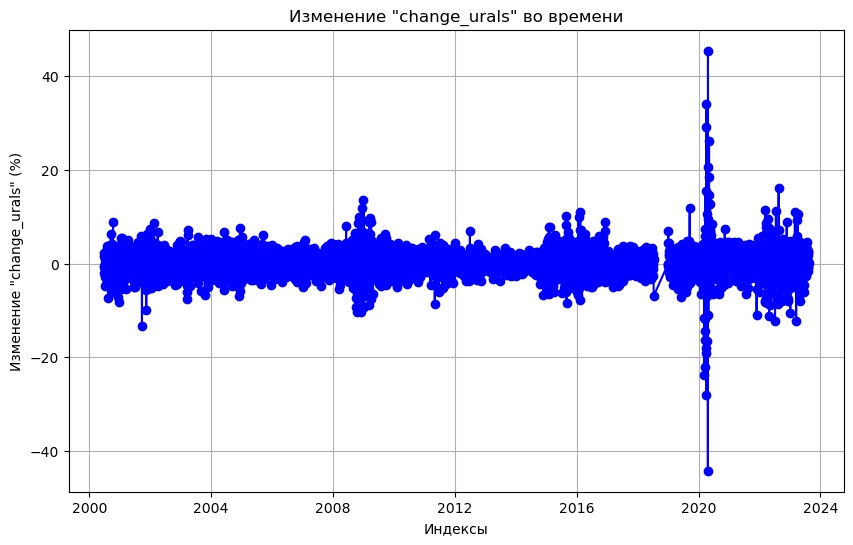

In [37]:
import matplotlib.pyplot as plt

# Предполагаем, что у вас уже есть combined_df DataFrame

# Выбор столбца 'change_RGBITR' для построения графика
change_RGBITR_column = combined_df['change1_RGBITR']

# Построение графика
plt.figure(figsize=(10, 6))  # Указание размера графика
plt.plot(change_RGBITR_column, marker='o', linestyle='-', color='b')  # Построение графика
plt.title('Изменение "change_RGBITR" во времени')  # Заголовок графика
plt.xlabel('Индексы')  # Название оси X
plt.ylabel('Изменение "change_RGBITR" (%)')  # Название оси Y
plt.grid(True)  # Включение сетки
plt.show()  # Отображение графика


In [35]:
combined_df.to_csv('brent.csv')

In [34]:
combined_df

,CLOSE,lag_value1c,lag_value2c,lag_value3c,lag_value4c,lag_value5c,lag_value6c,lag_value7c,lag_value8c,lag_value9c,...,change116_urals,change117_urals,change118_urals,change119_urals,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
2000-06-26,29.75,30.39,30.15,29.33,29.02,27.98,28.35,31.26,31.02,31.49,...,3.750527,2.771763,-2.243861,-0.463548,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-27,30.24,29.75,30.39,30.15,29.33,29.02,27.98,28.35,31.26,31.02,...,0.771730,3.750527,2.771763,-2.243861,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-28,30.11,30.24,29.75,30.39,30.15,29.33,29.02,27.98,28.35,31.26,...,0.685208,0.771730,3.750527,2.771763,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-29,30.80,30.11,30.24,29.75,30.39,30.15,29.33,29.02,27.98,28.35,...,1.961569,0.685208,0.771730,3.750527,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,30.57,30.80,30.11,30.24,29.75,30.39,30.15,29.33,29.02,27.98,...,0.706714,1.961569,0.685208,0.771730,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-07,NaN,72.06,70.81,69.04,70.23,70.23,68.60,69.05,68.79,67.80,...,0.513196,2.498591,-3.516404,-0.217037,71.41,"71,41","71,41","71,41",NaN,"-0,90%"
2023-08-08,NaN,71.41,72.06,70.81,69.04,70.23,70.23,68.60,69.05,68.79,...,-1.094092,0.513196,2.498591,-3.516404,71.80,"71,80","71,80","71,80",NaN,"0,55%"
2023-08-09,NaN,71.80,71.41,72.06,70.81,69.04,70.23,70.23,68.60,69.05,...,11.117257,-1.094092,0.513196,2.498591,73.73,"73,73","73,73","73,73",NaN,"2,69%"
2023-08-10,NaN,73.73,71.80,71.41,72.06,70.81,69.04,70.23,70.23,68.60,...,-0.630496,11.117257,-1.094092,0.513196,73.14,"73,14","73,14","73,14",NaN,"-0,80%"


In [7]:
brent = pd.read_csv('Iron_ore_fines_62%_Fe_CFR_Futures_Historical_Data.csv')


In [8]:
brent


,Date,Price,Open,High,Low,Vol.,Change %
0,07/27/2023,112.90,112.90,112.90,112.90,NaN,0.01%
1,07/26/2023,112.89,112.89,112.89,112.89,NaN,0.15%
2,07/25/2023,112.72,112.72,112.72,112.72,NaN,0.19%
3,07/24/2023,112.51,112.51,112.51,112.51,NaN,0.04%
4,07/21/2023,112.47,112.47,112.47,112.47,NaN,0.04%
...,...,...,...,...,...,...,...
3194,10/29/2010,147.50,147.50,147.50,147.50,NaN,2.43%
3195,10/28/2010,144.00,144.00,144.00,144.00,NaN,-0.35%
3196,10/27/2010,144.50,144.50,144.50,144.50,NaN,-0.41%
3197,10/26/2010,145.10,145.10,145.10,145.10,NaN,0.07%


In [29]:
brent.drop([0, 1, 2 ,3], axis=0, inplace=True)

In [30]:
brent.drop(['UnnaRGBITR: 0'	, 'UnnaRGBITR: 1'	, 'UnnaRGBITR: 2'	 ,'UnnaRGBITR: 5'	, 'UnnaRGBITR: 6'	, 'UnnaRGBITR: 7'	], axis=1, inplace=True)

In [31]:
brent.rename(columns={'UnnaRGBITR: 3': '<DATE>', 'UnnaRGBITR: 4': 'CLOSE'}, inplace=True)


In [18]:
brent



,<TICKER>;<PER>;<DATE>;<TIME>;<OPEN>;<HIGH>;<LOW>;<CLOSE>;<VOL>
0,SPFB.BR;D;20090716;000000;63.7300000;64.320000...
1,SPFB.BR;D;20090717;000000;63.9700000;66.420000...
2,SPFB.BR;D;20090720;000000;66.6600000;67.390000...
3,SPFB.BR;D;20090721;000000;66.6300000;68.500000...
4,SPFB.BR;D;20090722;000000;67.3300000;68.010000...
...,...
2375,SPFB.BR;D;20181225;000000;50.6000000;50.760000...
2376,SPFB.BR;D;20181226;000000;49.4200000;55.000000...
2377,SPFB.BR;D;20181227;000000;54.9000000;54.900000...
2378,SPFB.BR;D;20181228;000000;53.0400000;53.550000...


In [16]:
RGBITR

NameError: name 'urals' is not defined